# CNN for emotion face detection


## Desription

    -  Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger).
    -  We need to design a CNN which will classify images based on followinf facial expression 

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import shutil
warnings.filterwarnings('ignore')

# defining dir variables 
root_dir = '../input/face-new/face/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

## Dataset

    The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset.

### Target labels in dataset

In [2]:
target_var = os.listdir(train_dir)
target_var

['angry', 'neutral', 'sad', 'happy']

In [3]:
class_folders = os.listdir(train_dir)

# Loop melalui setiap folder kelas dan tampilkan isinya
for class_folder in class_folders:
    class_path = os.path.join(train_dir, class_folder)
    print(f"Kelas: {class_folder}")

Kelas: angry
Kelas: neutral
Kelas: sad
Kelas: happy


### Sample images 

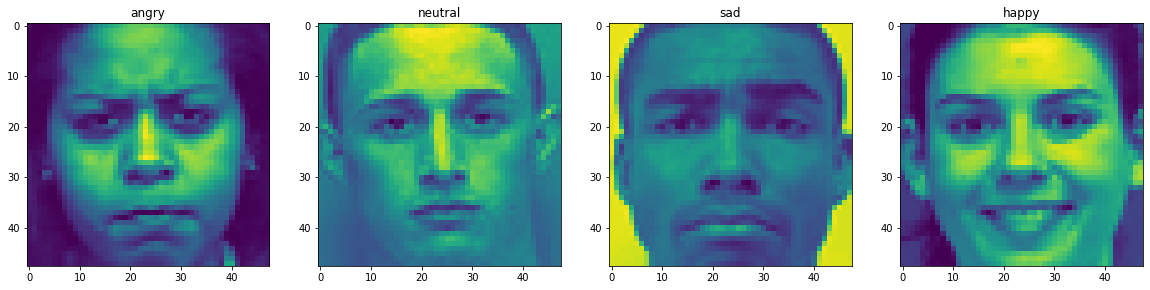

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

## EDA (Exploring number of images in each class)

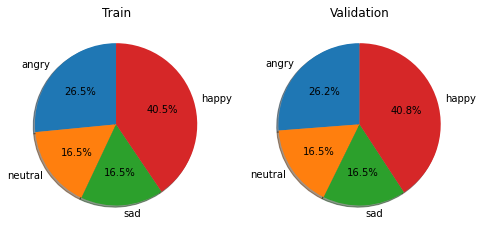

Emotion : angry
	Training : 108
	 Validation : 27
Emotion : neutral
	Training : 67
	 Validation : 17
Emotion : sad
	Training : 67
	 Validation : 17
Emotion : happy
	Training : 165
	 Validation : 42


In [6]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Validation')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Validation : ' + str(len(os.listdir(test_dir+i+'/'))))
    


## Data loading and perprocessing

    - 0/1 Normalization 
    - Grayscale
    - input shape resize for CNN (300x300)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 128

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 286 images belonging to 4 classes.
Found 121 images belonging to 4 classes.
Found 103 images belonging to 4 classes.


In [7]:
# Mencetak kamus yang memetakan nama kelas ke indeks numerik
print("Kelas pada dataset:")
print(train.class_indices)
# Mencetak kamus yang memetakan nama kelas ke indeks numerik
print("Kelas pada dataset:")
print(valid.class_indices)
# Mencetak kamus yang memetakan nama kelas ke indeks numerik
print("Kelas pada dataset:")
print(test.class_indices)


Kelas pada dataset:
{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}
Kelas pada dataset:
{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}
Kelas pada dataset:
{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}


## CNN

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(48, 48, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4, kernel_initializer='he_normal', activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

### Bulding model

### Compile and run

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=50)

Epoch 1/50
3/3 [==============================] - 10s 844ms/step - loss: 2.3487 - accuracy: 0.2192 - val_loss: 2.5331 - val_accuracy: 0.4050
Epoch 2/50
3/3 [==============================] - 0s 136ms/step - loss: 2.2334 - accuracy: 0.2261 - val_loss: 2.3743 - val_accuracy: 0.4050
Epoch 3/50
3/3 [==============================] - 1s 190ms/step - loss: 2.0468 - accuracy: 0.3199 - val_loss: 2.3966 - val_accuracy: 0.4050
Epoch 4/50
3/3 [==============================] - 1s 175ms/step - loss: 1.9441 - accuracy: 0.3160 - val_loss: 2.4456 - val_accuracy: 0.4050
Epoch 5/50
3/3 [==============================] - 0s 160ms/step - loss: 1.9500 - accuracy: 0.3056 - val_loss: 2.4969 - val_accuracy: 0.4050
Epoch 6/50
3/3 [==============================] - 0s 142ms/step - loss: 1.7572 - accuracy: 0.3724 - val_loss: 2.3889 - val_accuracy: 0.4050
Epoch 7/50
3/3 [==============================] - 0s 151ms/step - loss: 1.7372 - accuracy: 0.3768 - val_loss: 2.2118 - val_accuracy: 0.4050
Epoch 8/50
3/3 [===

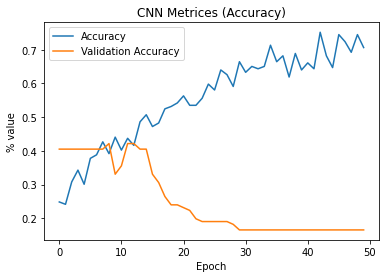

In [11]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

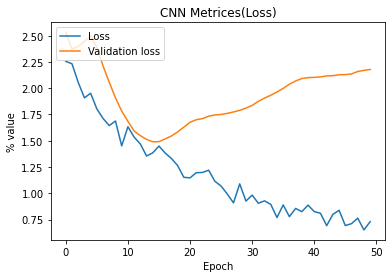

In [12]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

## Testing and evaluation¶

In [13]:
y_pred = model.predict(test)

In [14]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [15]:
y_actual = test.classes[test.index_array]

In [16]:
test

In [17]:
test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [18]:
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

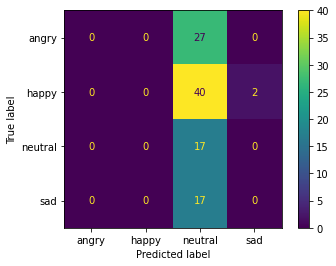

In [19]:
from sklearn import metrics

classes = ['angry', 'happy', 'neutral', 'sad']

# Hitung confusion matrix
cm = metrics.confusion_matrix(y_actual, y_pred_labels)

# Buat objek ConfusionMatrixDisplay dengan label kelas
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Tampilkan plot confusion matrix
disp.plot()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.0000    0.0000    0.0000        42
           2     0.1683    1.0000    0.2881        17
           3     0.0000    0.0000    0.0000        17

    accuracy                         0.1650       103
   macro avg     0.0421    0.2500    0.0720       103
weighted avg     0.0278    0.1650    0.0476       103



In [27]:
# Save your model in HDF5 format
model.save('face_v2.h5')